In [2]:
!pip install dlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 41.5 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for dlib: filename=dlib-19.24.4-cp310-cp310-linux_x86_64.whl size=3327202 sha256=2db252bf03dc4ac7116a45829ae12e126abdf335d77dfe9c7311c4eb293b3cd4
  Stored in directory: /root/.cache/pip/wheels/08/5e/55/a7db8d57920eb2c2aa41c36dc4c6d3cd12323865de191a7211
Successfully built dlib


In [2]:
!pip install requests
import requests

def download_file(url, filename):
    # Send a GET request to the URL
    response = requests.get(url)
    response.raise_for_status()  # Raises an exception for HTTP errors
    
    # Save the file
    with open(filename, 'wb') as f:
        f.write(response.content)
    print(f'Download complete: {filename}')

# URL to the dlib pre-trained model for facial landmark detection
url = "https://github.com/davisking/dlib-models/raw/master/shape_predictor_68_face_landmarks.dat.bz2"
filename = "shape_predictor_68_face_landmarks.dat.bz2"

download_file(url, filename)

print("Unzipping the file...")

# Unzipping the .bz2 file to get the .dat file
import bz2
with bz2.open(filename, 'rb') as file:
    decompressed_data = file.read()
    with open('shape_predictor_68_face_landmarks.dat', 'wb') as new_file:
        new_file.write(decompressed_data)

print("File is ready to use: shape_predictor_68_face_landmarks.dat")


Download complete: shape_predictor_68_face_landmarks.dat.bz2
Unzipping the file...
File is ready to use: shape_predictor_68_face_landmarks.dat


In [3]:
import cv2
import dlib
import os
import numpy as np
from transformers import BertTokenizer, BertModel

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Function to process text using BERT and get embeddings
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=128)
    outputs = bert_model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().detach().numpy()
    return embeddings

# Function to process video and get facial landmarks for each frame
def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    frame_landmarks = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)
        
        for face in faces:
            shape = predictor(gray, face)
            landmark = np.array([(part.x, part.y) for part in shape.parts()]).flatten()
            frame_landmarks.append(landmark)
    
    cap.release()
    return frame_landmarks

# Function to read data from files and combine features
def read_data_from_files(main_directory_text, main_directory_video):
    data = []
    
    for class_folder in os.listdir(main_directory_text):
        class_folder_path_text = os.path.join(main_directory_text, class_folder)
        class_folder_path_video = os.path.join(main_directory_video, class_folder)
        
        if os.path.isdir(class_folder_path_text) and os.path.isdir(class_folder_path_video):
            text_files = {f[:-4]: f for f in os.listdir(class_folder_path_text) if f.endswith('.txt')}
            video_files = {f[:-4]: f for f in os.listdir(class_folder_path_video) if f.endswith('.mp4')}
            #print(text_files,video_files)
            common_files = set(text_files.keys()).intersection(video_files.keys())
            
            for base_name in common_files:
                filepath_text = os.path.join(class_folder_path_text, text_files[base_name])
                filepath_video = os.path.join(class_folder_path_video, video_files[base_name])
                print(base_name)
                with open(filepath_text, 'r', encoding='utf-8') as file:
                    text = file.read()
                    text_embedding = get_bert_embeddings(text)
                
                frame_landmarks = process_video(filepath_video)
                
                for landmark in frame_landmarks:
                    if landmark.size > 0:
                        combined_features = np.concatenate([text_embedding, landmark])
                        data.append((combined_features, class_folder))
                    else:
                        print(f"No landmarks found for frame in video {base_name}, skipping.")
    
    return data

# Example usage
data_directory_text = '/kaggle/input/audio-and-text/Transcription'
data_directory_video = '/kaggle/input/real-life-deception-detection/Real-life_Deception_Detection_2016/Clips'
data = read_data_from_files(data_directory_text, data_directory_video)

# Separate features and labels
features = np.array([d[0] for d in data])
labels = np.array([d[1] for d in data])

print("Features shape:", features.shape)
print("Labels shape:", labels.shape)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

trial_lie_056
trial_lie_011
trial_lie_025
trial_lie_030
trial_lie_036
trial_lie_037
trial_lie_016
trial_lie_051
trial_lie_024
trial_lie_021
trial_lie_031
trial_lie_061
trial_lie_034
trial_lie_001
trial_lie_033
trial_lie_006
trial_lie_017
trial_lie_045
trial_lie_043
trial_lie_047
trial_lie_028
trial_lie_046
trial_lie_057
trial_lie_013
trial_lie_048
trial_lie_019
trial_lie_027
trial_lie_050
trial_lie_041
trial_lie_054
trial_lie_020
trial_lie_003
trial_lie_049
trial_lie_052
trial_lie_060
trial_lie_035
trial_lie_044
trial_lie_039
trial_lie_015
trial_lie_038
trial_lie_055
trial_lie_010
trial_lie_032
trial_lie_005
trial_lie_014
trial_lie_023
trial_lie_004
trial_lie_002
trial_lie_009
trial_lie_040
trial_lie_026
trial_lie_059
trial_lie_008
trial_lie_007
trial_lie_029
trial_lie_022
trial_lie_053
trial_lie_018
trial_lie_012
trial_lie_042
trial_lie_058
trial_truth_026
trial_truth_011
trial_truth_004
trial_truth_059
trial_truth_039
trial_truth_009
trial_truth_046
trial_truth_048
trial_truth_056
tr

In [4]:
import pickle

# Print the shapes of the features and labels
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

# Save features and labels to a pkl file
with open('V+T.pkl', 'wb') as file:
    pickle.dump((features, labels), file)

print("Data saved to data.pkl")


Features shape: (82575, 904)
Labels shape: (82575,)
Data saved to data.pkl


In [2]:
import pickle

# Load features and labels from the pkl file
with open('V+T.pkl', 'rb') as file:
    features, labels = pickle.load(file)

print("Features shape:", features.shape)
print("Labels shape:", labels.shape)


Features shape: (82575, 904)
Labels shape: (82575,)


In [3]:
import pandas as pd

features_df = pd.DataFrame(features)
features_df['label'] = labels

print(features_df)

              0         1         2         3         4         5         6  \
0     -0.131997  0.011148  0.057074  0.021334  0.429900  0.107217 -0.002795   
1     -0.131997  0.011148  0.057074  0.021334  0.429900  0.107217 -0.002795   
2     -0.131997  0.011148  0.057074  0.021334  0.429900  0.107217 -0.002795   
3     -0.131997  0.011148  0.057074  0.021334  0.429900  0.107217 -0.002795   
4     -0.131997  0.011148  0.057074  0.021334  0.429900  0.107217 -0.002795   
...         ...       ...       ...       ...       ...       ...       ...   
82570  0.178336 -0.171147  0.245340  0.106234  0.174196  0.106602 -0.052342   
82571  0.178336 -0.171147  0.245340  0.106234  0.174196  0.106602 -0.052342   
82572  0.178336 -0.171147  0.245340  0.106234  0.174196  0.106602 -0.052342   
82573  0.178336 -0.171147  0.245340  0.106234  0.174196  0.106602 -0.052342   
82574  0.178336 -0.171147  0.245340  0.106234  0.174196  0.106602 -0.052342   

              7         8         9  ...    895    

In [4]:
print(features_df['label'])

0        Deceptive
1        Deceptive
2        Deceptive
3        Deceptive
4        Deceptive
           ...    
82570     Truthful
82571     Truthful
82572     Truthful
82573     Truthful
82574     Truthful
Name: label, Length: 82575, dtype: object


In [5]:
from sklearn.model_selection import train_test_split
# Split into training, validation, and test sets
train_df, test_df = train_test_split(features_df, test_size=0.2, random_state=42)
# 0.25 x 0.8 = 0.2
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

In [6]:
# Optionally, save to CSV or another format
train_df.to_csv('train_visual_WithBert_data.csv', index=False)
val_df.to_csv('val_visual_WithBert_data.csv', index=False)
test_df.to_csv('test_visual_WithBert_data.csv', index=False)

In [6]:
print(train_df.shape)
print(test_df.shape)
print(val_df.shape)

(49545, 905)
(16515, 905)
(16515, 905)


In [7]:
def separate_features_and_labels(df):
    X = df.drop(columns=['label']).values  # Drop the label column to get features
    y = df['label'].apply(lambda x: 1 if x == 'Truthful' else 0).values  # Convert labels to binary
    return X, y

X_train, y_train = separate_features_and_labels(train_df)
X_val, y_val = separate_features_and_labels(val_df)
X_test, y_test = separate_features_and_labels(test_df)

In [8]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [13]:
input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)
model = models.Sequential([
    layers.LSTM(1024, input_shape=input_shape, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(512, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(256, return_sequences=False),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 1, 1024)        │     7,901,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1, 1024)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 1, 512)         │     3,147,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 256)            │       787,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,836,673 (45.15 MB)

 Trainable params: 11,836,673 (45.15 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
batch_size = 128
epochs = 20

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

Epoch 1/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.6795 - loss: 0.5842 - val_accuracy: 0.8146 - val_loss: 0.4137
Epoch 2/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7859 - loss: 0.4501 - val_accuracy: 0.8666 - val_loss: 0.3306
Epoch 3/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8073 - loss: 0.4131 - val_accuracy: 0.8228 - val_loss: 0.3171
Epoch 4/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8326 - loss: 0.3629 - val_accuracy: 0.8991 - val_loss: 0.2683
Epoch 5/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8550 - loss: 0.3233 - val_accuracy: 0.9034 - val_loss: 0.2579
Epoch 6/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8550 - loss: 0.3360 - val_accuracy: 0.9514 - val_loss: 0.1834
Epoch 7/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8754 - loss: 0.2999 - val_accuracy: 0.8891 - val_loss: 0.2738
Epoch 8/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8759 - loss: 0.3024 - val_accu

In [15]:
model.save("New_visual+text.h5")

Load Data from CSV

517/517 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9740 - loss: 0.0978
Test Accuracy: 0.9757795929908752
517/517 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
[[8437   65]
 [ 335 7678]]


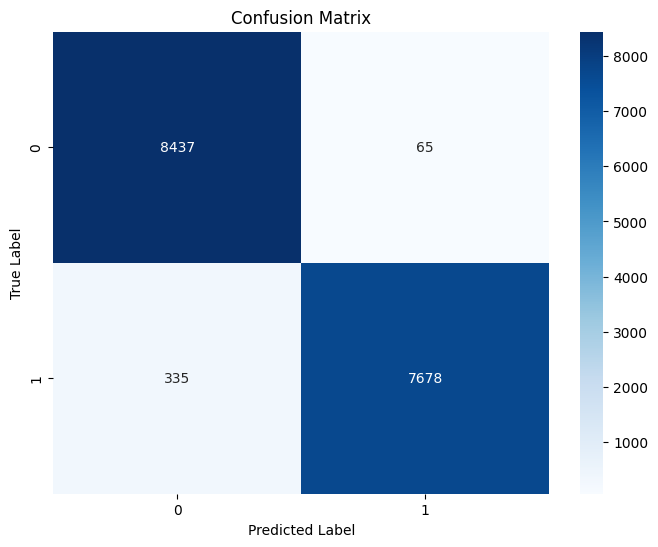

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Predict probabilities
test_probabilities = model.predict(X_test)
# Convert probabilities to binary predictions (0 or 1)
test_predictions = (test_probabilities > 0.5).astype(int)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# Fit the encoder with the original test labels to get the class names
encoder.fit(y_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, test_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

BILSTM

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.layers import LSTM, Bidirectional


input_shape = (X_train.shape[1], X_train.shape[2])
model = models.Sequential([
    layers.Bidirectional(LSTM(1024, return_sequences=True), input_shape=input_shape),
    layers.Dropout(0.2),
    layers.Bidirectional(LSTM(512, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(LSTM(256, return_sequences=False)),
    layers.Dense(1, activation='sigmoid'),
                         ])

learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_6 (Bidirectional) │ (None, 1, 2048)        │    15,802,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 1, 2048)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 1, 1024)        │    10,489,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 1, 1024)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 512)            │     2,623,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,916,225 (110.31 MB)

 Trainable params: 28,916,225 (110.31 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
batch_size = 128
epochs = 20

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

Epoch 1/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.6748 - loss: 0.5857 - val_accuracy: 0.8980 - val_loss: 0.3788
Epoch 2/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.7819 - loss: 0.4885 - val_accuracy: 0.7644 - val_loss: 0.4332
Epoch 3/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8027 - loss: 0.4513 - val_accuracy: 0.9482 - val_loss: 0.2487
Epoch 4/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8420 - loss: 0.3943 - val_accuracy: 0.9468 - val_loss: 0.2342
Epoch 5/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8580 - loss: 0.3512 - val_accuracy: 0.9338 - val_loss: 0.2640
Epoch 6/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8149 - loss: 0.4288 - val_accuracy: 0.8991 - val_loss: 0.2739
Epoch 7/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8676 - loss: 0.3308 - val_accuracy: 0.9612 - val_loss: 0.1912
Epoch 8/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.8944 - loss: 0.2963 - 

517/517 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8976 - loss: 0.2093
Test Accuracy: 0.9000908136367798
517/517 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Confusion Matrix:
[[8405   97]
 [1553 6460]]


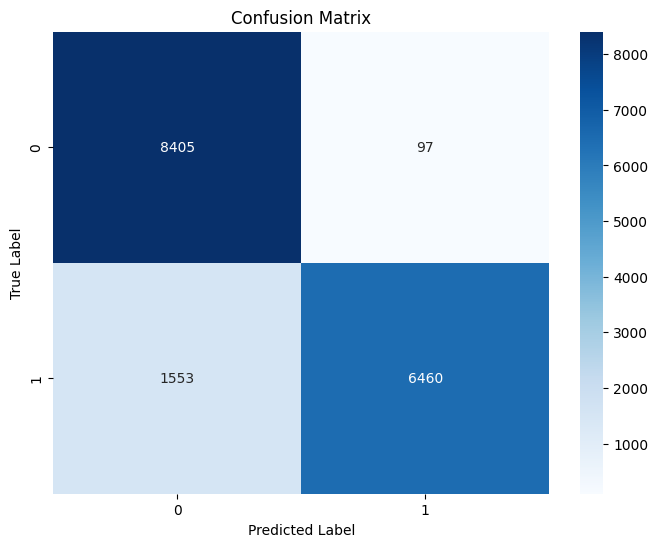

In [27]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Predict probabilities
test_probabilities = model.predict(X_test)
# Convert probabilities to binary predictions (0 or 1)
test_predictions = (test_probabilities > 0.5).astype(int)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# Fit the encoder with the original test labels to get the class names
encoder.fit(y_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, test_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

AttentionRESLSTM

In [15]:
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
import numpy as np
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Concatenate


# Define the LSTM model
timesteps = 1
input_shape = (X_train.shape[1], X_train.shape[2])

input_layer = Input(shape=input_shape)

lstm1 = LSTM(1024, return_sequences=True)(input_layer)
lstm1 = Dropout(0.2)(lstm1)
lstm1 = LSTM(1024, return_sequences=True)(lstm1)
lstm1 = Dropout(0.2)(lstm1)
lstm2 = LSTM(512, return_sequences=True)(lstm1)
lstm2 = Dropout(0.2)(lstm2)

lstm3 = LSTM(1024, return_sequences=True)(lstm2)
lstm3 = Dropout(0.2)(lstm3)
lstm4 = LSTM(1024, return_sequences=True)(lstm3)
lstm4 = Dropout(0.2)(lstm4)
lstm5 = LSTM(512, return_sequences=True)(lstm4)
lstm5 = Dropout(0.2)(lstm5)

xor_layer = Dense(512, activation='relu')(lstm5)

concatenated = Concatenate()([lstm2, xor_layer])

lstm6 = LSTM(1024, return_sequences=True)(concatenated)
lstm6 = Dropout(0.2)(lstm6)
lstm6 = LSTM(512, return_sequences=True)(lstm6)
lstm6 = Dropout(0.2)(lstm6)
lstm7 = LSTM(256, return_sequences=True)(lstm6)
lstm7 = Dropout(0.2)(lstm7)

output_layer = Dense(1, activation='sigmoid')(lstm7[:, -1, :])

model = Model(inputs=input_layer, outputs=output_layer)

initial_learning_rate = 0.0001
opt = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 1, 904)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_13 (LSTM)      │ (None, 1, 1024)   │  7,901,184 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 1, 1024)   │          0 │ lstm_13[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_14 (LSTM)      │ (None, 1, 1024)   │  8,392,704 │ dropout_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 1, 1024)   │          0 │ lstm_14[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_15 (LSTM)      │ (None, 1, 512)    │  3,147,776 │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 1, 512)    │          0 │ lstm_15[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_16 (LSTM)      │ (None, 1, 1024)   │  6,295,552 │ dropout_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 1, 1024)   │          0 │ lstm_16[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_17 (LSTM)      │ (None, 1, 1024)   │  8,392,704 │ dropout_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 1, 1024)   │          0 │ lstm_17[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_18 (LSTM)      │ (None, 1, 512)    │  3,147,776 │ dropout_13[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 1, 512)    │          0 │ lstm_18[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1, 512)    │    262,656 │ dropout_14[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 1, 1024)   │          0 │ dropout_11[0][0], │
│ (Concatenate)       │                   │            │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_19 (LSTM)      │ (None, 1, 1024)   │  8,392,704 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 1, 1024)   │          0 │ lstm_19[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_20 (LSTM)      │ (None, 1, 512)    │  3,147,776 │ dropout_15[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 1, 512)    │          0 │ lstm_20[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_21 (LSTM)      │ (None, 1, 256)    │    787,456 │ dropout_16[0][0]  │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 49,868,545 (190.23 MB)

 Trainable params: 49,868,545 (190.23 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
batch_size = 128
epochs = 20

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

Epoch 1/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.6235 - loss: 0.6068 - val_accuracy: 0.7752 - val_loss: 0.4309
Epoch 2/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.7707 - loss: 0.4658 - val_accuracy: 0.8543 - val_loss: 0.3378
Epoch 3/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.7997 - loss: 0.4157 - val_accuracy: 0.8164 - val_loss: 0.3395
Epoch 4/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.8337 - loss: 0.3716 - val_accuracy: 0.8910 - val_loss: 0.2803
Epoch 5/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.8702 - loss: 0.3205 - val_accuracy: 0.7781 - val_loss: 0.4059
Epoch 6/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.8628 - loss: 0.3240 - val_accuracy: 0.9078 - val_loss: 0.2336
Epoch 7/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.8338 - loss: 0.3486 - val_accuracy: 0.9470 - val_loss: 0.2284
Epoch 8/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.8555 - loss: 0.3226 - 

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Predict probabilities
test_probabilities = model.predict(X_test)
# Convert probabilities to binary predictions (0 or 1)
test_predictions = (test_probabilities > 0.5).astype(int)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# Fit the encoder with the original test labels to get the class names
encoder.fit(y_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, test_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()